In [1]:
# Data Exploration and visualization tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data from the file
raw_data = pd.read_csv('data/winequality-red.csv', low_memory=False)

In [3]:
raw_data.head(3).T

,0,1,2
fixed acidity,7.4000,7.8000,7.800
volatile acidity,0.7000,0.8800,0.760
citric acid,0.0000,0.0000,0.040
residual sugar,1.9000,2.6000,2.300
chlorides,0.0760,0.0980,0.092
free sulfur dioxide,11.0000,25.0000,15.000
total sulfur dioxide,34.0000,67.0000,54.000
density,0.9978,0.9968,0.997
pH,3.5100,3.2000,3.260
sulphates,0.5600,0.6800,0.650


### Data Contains:
**Input variables** (based on physicochemical tests):  
1 - *fixed acidity*  
    most acids involved with wine or fixed or nonvolatile (do not evaporate readily)  
2 - *volatile acidity*  
    the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste  
3 - *citric acid*  
    found in small quantities, citric acid can add 'freshness' and flavor to wines  
4 - *residual sugar*  
    the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet  
5 - *chlorides*  
    the amount of salt in the wine  
6 - *free sulfur dioxide*  
    the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine  
7 - *total sulfur dioxide*  
    amount of free and bound forms of SO2; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine  
8 - *density*  
    the density of water is close to that of water depending on the percent alcohol and sugar content  
9 - *pH*  
    describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale  
10 - *sulphates*  
    a wine additive which can contribute to sulfur dioxide gas (SO2) levels, wich acts as an antimicrobial and antioxidant  
11 - *alcohol*  
    the percent alcohol content of the wine  
  
**Output variable** (based on sensory data):  
12 - *quality* (score between 0 and 10)  

### Object
The datasets can be viewed both as classification or regression task.

I've chosen to do classification one. For that purpose it was recommended to set an arbitrary cutoff for the dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

### Data Exploration

In [4]:
print('Number of rows in the dataset:', raw_data.shape[0])
print('Number of columns in the dataset:', raw_data.shape[1])

Number of rows in the dataset: 1599
Number of columns in the dataset: 12


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Unique Values
unique_vals = raw_data.nunique().reset_index(name='Number of unique')
unique_vals

,index,Number of unique
0,fixed acidity,96
1,volatile acidity,143
2,citric acid,80
3,residual sugar,91
4,chlorides,153
5,free sulfur dioxide,60
6,total sulfur dioxide,144
7,density,436
8,pH,89
9,sulphates,96


Number of unique values by feature and float data type indicates there is no categorical features in the dataset.

In [7]:
# Null Values
null_vals = raw_data.isnull().sum().reset_index(name='Number of NaN values')
null_vals

,index,Number of NaN values
0,fixed acidity,0
1,volatile acidity,0
2,citric acid,0
3,residual sugar,0
4,chlorides,0
5,free sulfur dioxide,0
6,total sulfur dioxide,0
7,density,0
8,pH,0
9,sulphates,0


Number of Null values by feature indicates there is no missing data in our dataset.

In [8]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


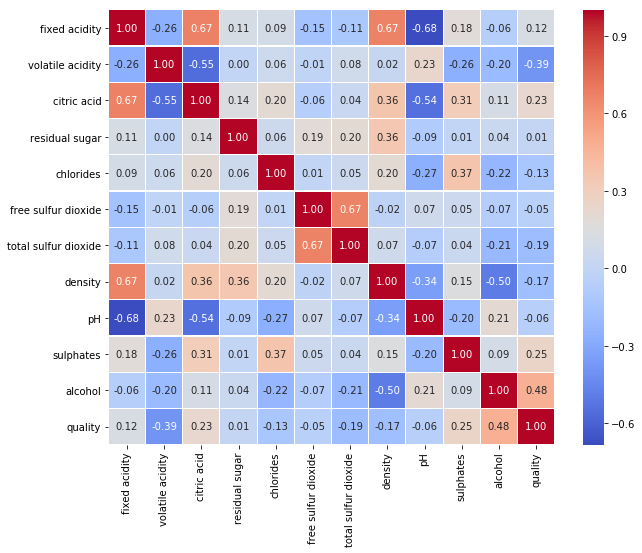

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(raw_data.corr(), annot = True, cmap='coolwarm', linewidths=.1, fmt='1.2f')

In [10]:
def plot_feature(feature, target, data):
    plt.figure(figsize=(15, 5))
    sns.set(style="darkgrid")
    plt.suptitle((feature.title() + ' vs. ' + target.title()))
    
    plt.subplot(1, 2, 1)
    sns.distplot(data[feature], bins = 9)
    
    plt.subplot(1, 2, 2)
    sns.barplot(x = target, y = feature, data = data)

In [11]:
cols = list(raw_data.columns)
features = cols[:-1]
target = cols[-1]
print(features)
print(target)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
quality


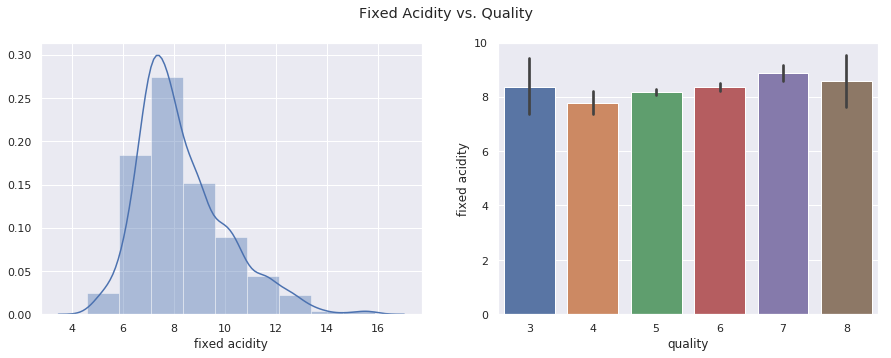

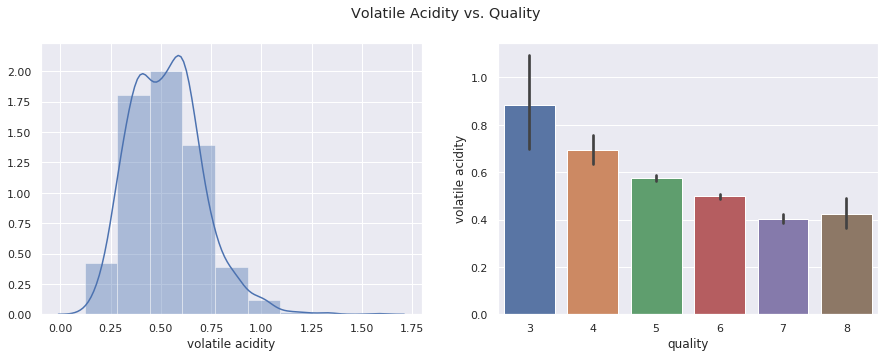

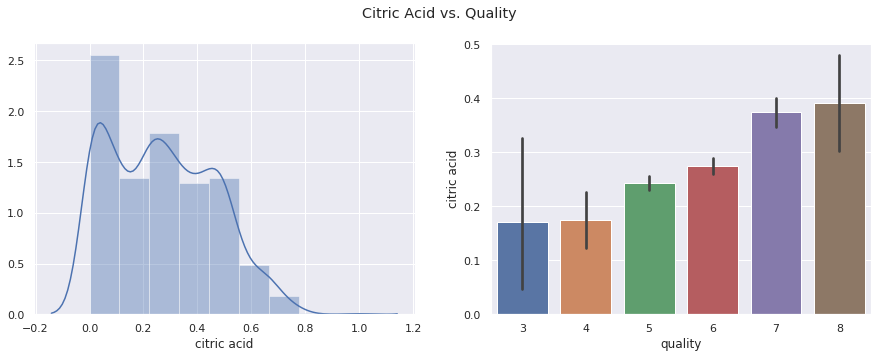

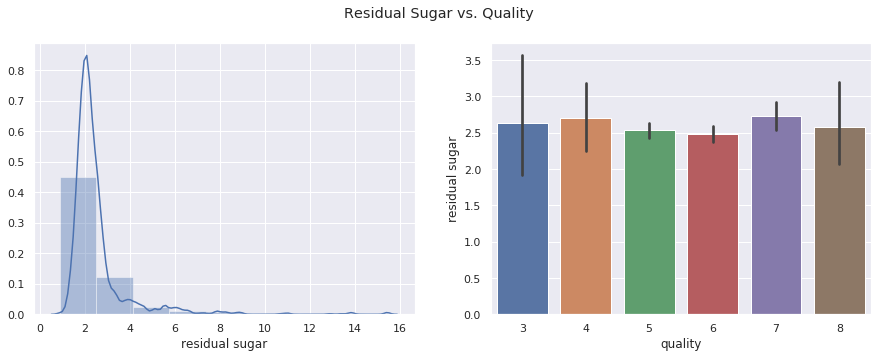

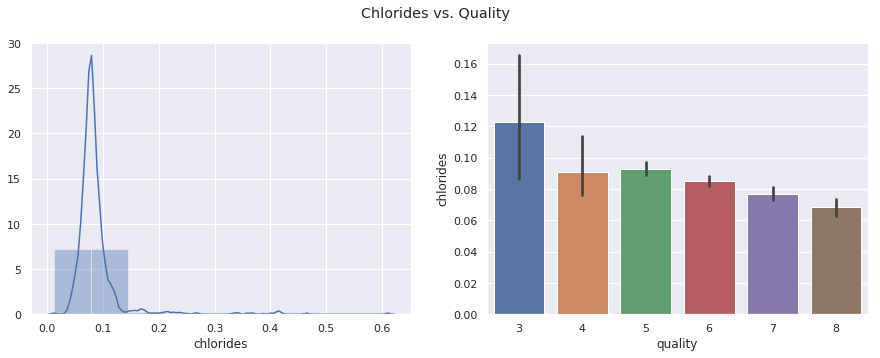

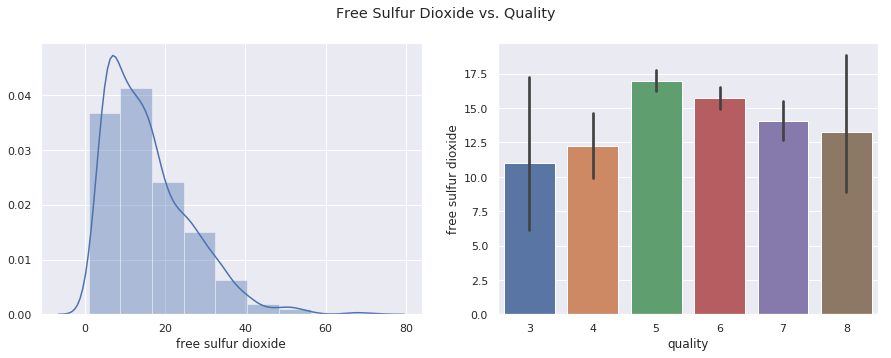

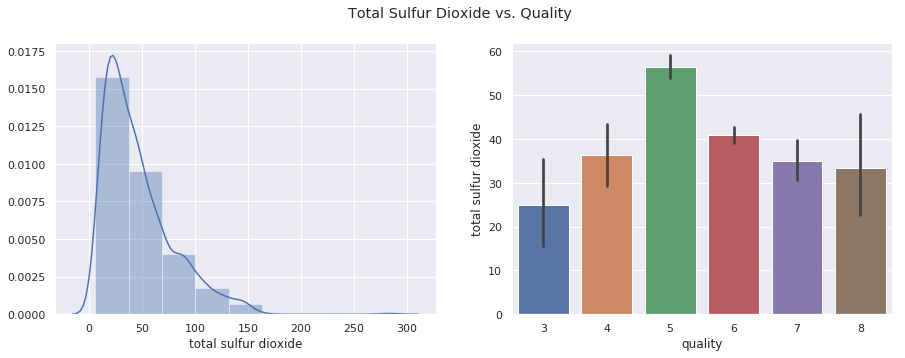

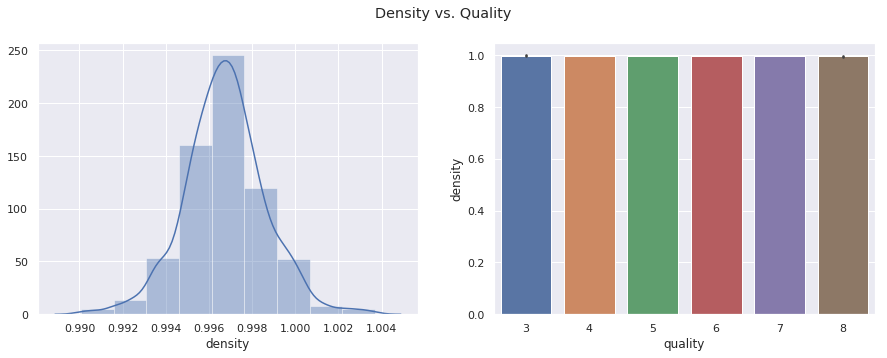

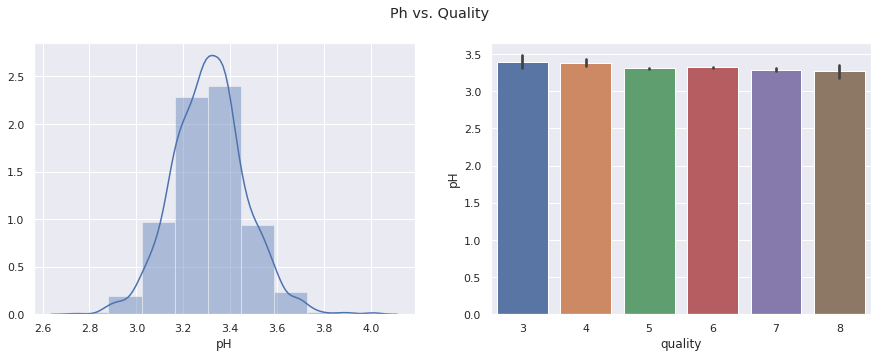

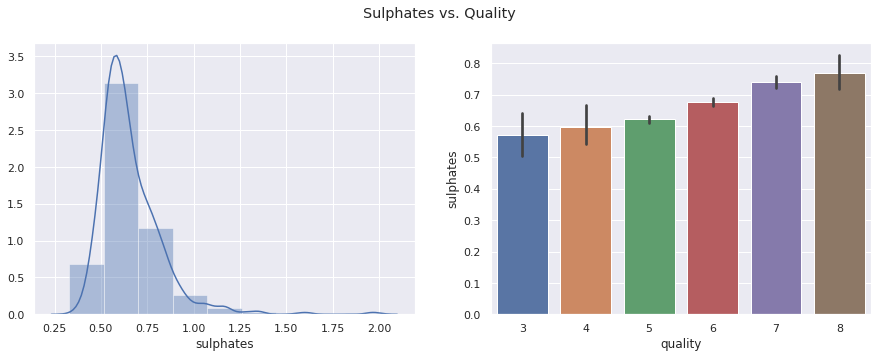

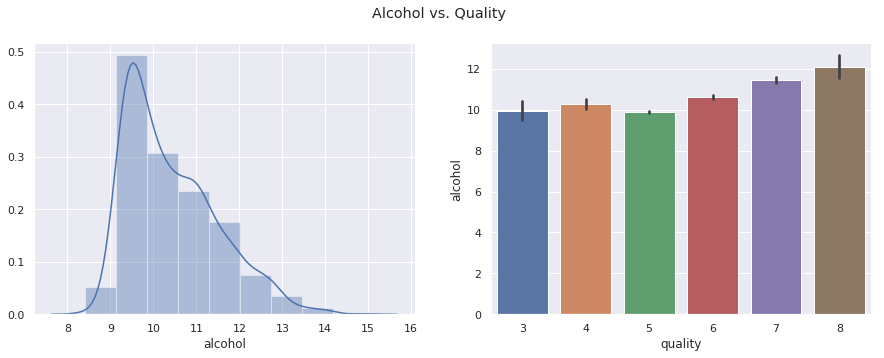

In [12]:
for item in features:
    plot_feature(item, 'quality', raw_data)

### Key Insights
Wine quality seems to increase, when:  
1. *Volatile Acidity* decreases.
2. *Citric Acid* increases.
3. *Chlorides* decreases.
4. *pH* decreases.
5. *Sulphates* increases.
6. *Alcohol* increases.

Other features do not manifest clear correlation with dependable variable.

### ML Models, tools and metrics

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

In [16]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, roc_curve, auc 

### Data Preprocessing

In [17]:
wine_data = raw_data.copy()

In [18]:
# Making binary classificaion for the wine quality variable.
bins = (2, 6.5, 8)
class_names = ['bad', 'good']
wine_data[target] = pd.cut(wine_data[target], bins = bins, labels = class_names)

In [19]:
label_encoder = LabelEncoder()
wine_data[target] = label_encoder.fit_transform(wine_data[target])
wine_data[target].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [20]:
labels = wine_data[target]

In [21]:
# Scaling all features
data = wine_data.drop(target, axis = 1)
data_scaler = StandardScaler()
data = data_scaler.fit_transform(data)

### Data Split - Train / Validation / Test

In [22]:
train_data, valtest_data, train_labels, valtest_labels = train_test_split(
    data, labels, test_size=0.5, random_state=10
)

In [23]:
test_data, val_data, test_labels, val_labels = train_test_split(
    valtest_data, valtest_labels, test_size=0.5, random_state=11
)

In [24]:
[x.shape for x in (train_data, val_data, test_data, train_labels, val_labels, test_labels)]

[(799, 11), (400, 11), (400, 11), (799,), (400,), (400,)]

### Building models

In [25]:
val_metrics = pd.DataFrame(columns = ['Precision', 'Accuracy'])

### Neural Network Model

In [26]:
import tensorflow as tf

In [27]:
def make_sequential_model(n_layers, n_outputs, input_shape, layer_size):
    layers = [tf.keras.layers.BatchNormalization(input_shape=input_shape)]
    for _ in range(n_layers):
        layers.extend([
            tf.keras.layers.Dense(layer_size, kernel_initializer='he_uniform'),
            tf.keras.layers.LeakyReLU(),
            tf.keras.layers.BatchNormalization(),
        ])
    layers.append(tf.keras.layers.Dense(n_outputs, activation='sigmoid'))    
    return tf.keras.Sequential(layers)


In [28]:
model_name = 'DNNC'
model = make_sequential_model(5, 1, train_data.shape[1:], 512)

Instructions for updating:
Colocations handled automatically by placer.


In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[
        tf.keras.metrics.binary_accuracy,
    ]
)

In [30]:
model.fit(
    train_data,
    train_labels,
    validation_data=(val_data, val_labels),
    batch_size=64,
    epochs=25,
)

Train on 799 samples, validate on 400 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
799/799 [==============================] - 4s 5ms/sample - loss: 0.7282 - binary_accuracy: 0.6333 - val_loss: 0.5214 - val_binary_accuracy: 0.7825
Epoch 2/25
799/799 [==============================] - 1s 997us/sample - loss: 0.6055 - binary_accuracy: 0.7247 - val_loss: 0.6178 - val_binary_accuracy: 0.7275
Epoch 3/25
799/799 [==============================] - 1s 1ms/sample - loss: 0.5709 - binary_accuracy: 0.7635 - val_loss: 0.5696 - val_binary_accuracy: 0.7800
Epoch 4/25
799/799 [==============================] - 1s 993us/sample - loss: 0.5269 - binary_accuracy: 0.8098 - val_loss: 0.5863 - val_binary_accuracy: 0.7725
Epoch 5/25
799/799 [==============================] - 1s 962us/sample - loss: 0.5012 - binary_accuracy: 0.8260 - val_loss: 0.5544 - val_binary_accuracy: 0.8000
Epoch 6/25
799/799 [==============================] - 1s 977us/sample - loss: 0.4779 - binary_accuracy: 0.8348

In [31]:
# Saving and Reloading model
model.save('data/dnnc_wine.h5')
model = tf.keras.models.load_model('data/dnnc_wine.h5')

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_v1 (Batc (None, 11)                44        
_________________________________________________________________
dense (Dense)                (None, 512)               6144      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 512)               2048      
__________

In [33]:
model.evaluate(val_data, val_labels)

400/400 [==============================] - 1s 2ms/sample - loss: 0.4668 - binary_accuracy: 0.8575


[0.46684200525283814, 0.8575]

In [34]:
val_preds = model.predict(val_data)

In [35]:
print(confusion_matrix(val_labels, val_preds > 0.5))

[[307  41]
 [ 16  36]]


In [36]:
print(classification_report(val_labels, val_preds > 0.5))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       348
           1       0.47      0.69      0.56        52

   micro avg       0.86      0.86      0.86       400
   macro avg       0.71      0.79      0.74       400
weighted avg       0.89      0.86      0.87       400



In [37]:
model_prec = precision_score(val_labels, val_preds > 0.5, average='weighted')
print('Using Deep Neural Network we get a precision score of:', str(round(model_prec * 100, 2))+'%')

Using Deep Neural Network we get a precision score of: 88.77%


In [38]:
model_accu = accuracy_score(val_labels, val_preds > 0.5)
print('Using Deep Neural Network we get an accuracy score of:', str(round(model_accu * 100, 2))+'%')

Using Deep Neural Network we get an accuracy score of: 85.75%


In [39]:
val_metrics.loc[model_name, 'Precision'] = model_prec
val_metrics.loc[model_name, 'Accuracy'] = model_accu

### Classic ML Model - Logistic Regression

In [40]:
model_name = 'LR'
model = LogisticRegression(solver='lbfgs', max_iter=5000)

In [41]:
model.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
# Saving and Reloading model
joblib.dump(model, 'data/lr_wine.pkl')
model = joblib.load('data/lr_wine.pkl')

In [43]:
val_preds = model.predict(val_data)

In [44]:
print(confusion_matrix(val_labels, val_preds))

[[330  18]
 [ 38  14]]


In [45]:
print(classification_report(val_labels, val_preds))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       348
           1       0.44      0.27      0.33        52

   micro avg       0.86      0.86      0.86       400
   macro avg       0.67      0.61      0.63       400
weighted avg       0.84      0.86      0.85       400



In [46]:
model_prec = precision_score(val_labels, val_preds, average='weighted')
print('Using Logistic Regression we get a precision score of:', str(round(model_prec * 100, 2))+'%')

Using Logistic Regression we get a precision score of: 83.7%


In [47]:
model_accu = accuracy_score(val_labels, val_preds)
print('Using Logistic Regression we get an accuracy score of:', str(round(model_accu * 100, 2))+'%')

Using Logistic Regression we get an accuracy score of: 86.0%


In [48]:
val_metrics.loc[model_name, 'Precision'] = model_prec
val_metrics.loc[model_name, 'Accuracy'] = model_accu

### Classic ML Model - Random Forest Classifier

In [49]:
model_name = 'RFC'
model = RandomForestClassifier(n_estimators = 100, n_jobs = -1)

In [50]:
model.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
# Saving and Reloading model
joblib.dump(model, 'data/rfc_wine.pkl')
model = joblib.load('data/rfc_wine.pkl')

In [52]:
val_preds = model.predict(val_data)

In [53]:
print(confusion_matrix(val_labels, val_preds))

[[335  13]
 [ 31  21]]


In [54]:
print(classification_report(val_labels, val_preds))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       348
           1       0.62      0.40      0.49        52

   micro avg       0.89      0.89      0.89       400
   macro avg       0.77      0.68      0.71       400
weighted avg       0.88      0.89      0.88       400



In [55]:
model_prec = precision_score(val_labels, val_preds, average='weighted')
print('Using Random Forest Classifier we get a precision score of:', str(round(model_prec * 100, 2))+'%')

Using Random Forest Classifier we get a precision score of: 87.66%


In [56]:
model_accu = accuracy_score(val_labels, val_preds)
print('Using Random Forest Classifier we get an accuracy score of:', str(round(model_accu * 100, 2))+'%')

Using Random Forest Classifier we get an accuracy score of: 89.0%


In [57]:
val_metrics.loc[model_name, 'Precision'] = model_prec
val_metrics.loc[model_name, 'Accuracy'] = model_accu

### Classic ML Model - Random Forest Classifier Hyperparameter Tuning

In [58]:
model_name = 'RFC_RS'
model = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions={
        "n_estimators": np.arange(10, 500),
        "min_samples_leaf": np.arange(1, 100),
        "max_depth": np.arange(1, 100),
        "max_features": ['sqrt', 'log2', 0.1],
    },
    n_iter=100,
    n_jobs=-1,
    cv=5,
    verbose=1,
)

In [59]:
model.fit(train_data, train_labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': array([ 10,  11, ..., 498, 499]), 'min_samples_leaf': array([ 1,  2, ..., 98, 99]), 'max_depth': array([ 1,  2, ..., 98, 99]), 'max_features': ['sqrt', 'log2', 0.1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [60]:
# Saving and Reloading model
joblib.dump(model, 'data/rfcrs_wine.pkl')
model = joblib.load('data/rfcrs_wine.pkl')

In [61]:
model.best_params_

{'n_estimators': 82,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 28}

In [62]:
model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=28, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
model.best_score_

0.9148936170212766

In [64]:
val_preds = model.predict(val_data)

In [65]:
print(confusion_matrix(val_labels, val_preds))

[[337  11]
 [ 31  21]]


In [66]:
print(classification_report(val_labels, val_preds))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       348
           1       0.66      0.40      0.50        52

   micro avg       0.90      0.90      0.90       400
   macro avg       0.79      0.69      0.72       400
weighted avg       0.88      0.90      0.88       400



In [67]:
model_prec = precision_score(val_labels, val_preds, average='weighted')
print('Using Random Forest Classifier with RS we get a precision score of:', str(round(model_prec * 100, 2))+'%')

Using Random Forest Classifier with RS we get a precision score of: 88.2%


In [68]:
model_accu = accuracy_score(val_labels, val_preds)
print('Using Random Forest Classifier with RS we get an accuracy score of:', str(round(model_accu * 100, 2))+'%')

Using Random Forest Classifier with RS we get an accuracy score of: 89.5%


In [69]:
val_metrics.loc[model_name, 'Precision'] = model_prec
val_metrics.loc[model_name, 'Accuracy'] = model_accu

In [70]:
model_name = 'RFC_GS'
model = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        "n_estimators": np.linspace(10, 500, 3).astype(int),
        "min_samples_leaf": np.linspace(1, 100, 3).astype(int),
        "max_depth": np.linspace(10, 100, 3).astype(int),
        "max_features": ['sqrt', 'log2', 0.1],
    },
    n_jobs=-1,
    cv=5,
    verbose=1,
)

In [71]:
model.fit(train_data, train_labels)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  6.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([ 10, 255, 500]), 'min_samples_leaf': array([  1,  50, 100]), 'max_depth': array([ 10,  55, 100]), 'max_features': ['sqrt', 'log2', 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [72]:
# Saving and Reloading model
joblib.dump(model, 'data/rfcgs_wine.pkl')
model = joblib.load('data/rfcgs_wine.pkl')

In [73]:
model.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 255}

In [74]:
model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=255, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
model.best_score_

0.918648310387985

In [76]:
val_preds = model.predict(val_data)

In [77]:
print(confusion_matrix(val_labels, val_preds))

[[337  11]
 [ 30  22]]


In [78]:
print(classification_report(val_labels, val_preds))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       348
           1       0.67      0.42      0.52        52

   micro avg       0.90      0.90      0.90       400
   macro avg       0.79      0.70      0.73       400
weighted avg       0.89      0.90      0.89       400



In [79]:
model_prec = precision_score(val_labels, val_preds, average='weighted')
print('Using Random Forest Classifier with GS we get a precision score of:', str(round(model_prec * 100, 2))+'%')

Using Random Forest Classifier with GS we get a precision score of: 88.55%


In [80]:
model_accu = accuracy_score(val_labels, val_preds)
print('Using Random Forest Classifier with GS we get an accuracy score of:', str(round(model_accu * 100, 2))+'%')

Using Random Forest Classifier with GS we get an accuracy score of: 89.75%


In [81]:
val_metrics.loc[model_name, 'Precision'] = model_prec
val_metrics.loc[model_name, 'Accuracy'] = model_accu

### Comparing models

In [82]:
val_metrics

,Precision,Accuracy
DNNC,0.887683,0.8575
LR,0.837038,0.86
RFC,0.876606,0.89
RFC_RS,0.882024,0.895
RFC_GS,0.88555,0.8975


Overall taking into account both scores looks like Random Forest Classiffier with Grid Search hyperparameter tuning gets the best results. But Neural Network has a small edge in Precision score over it. For the sake of the current task I think I need better Precision score rather Accuracy one. So, I've decided to move on with Neural Network for the final testing.

### Final test